<a href="https://colab.research.google.com/github/rmperez556/CD_databits/blob/main/DataBIts_proyecto_final2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import numpy as np
import pandas as pd
import sklearn as sk
# Librerías para visualización
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
data_set = "/content/drive/MyDrive/Colab Notebooks/DataSets/car data.csv"

In [ ]:
df = pd.read_csv(data_set, decimal= '.')

In [ ]:
print('Filas y columnas - datos de entrenamiento', df.shape)

Filas y columnas - datos de entrenamiento (301, 9)


In [ ]:
print(df.dtypes)

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object


In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [ ]:
df.Owner.unique()

array([0, 1, 3])

In [ ]:
#Diccionario sucesivo
categoria = df.Year.unique()
cat_dic={}
cont = 0
for cat in categoria:
    print(cat)
    cat_dic[cat] = cont
    cont = cont +1
cat_dic

2014
2013
2017
2011
2018
2015
2016
2009
2010
2012
2003
2008
2006
2005
2004
2007


{2014: 0,
 2013: 1,
 2017: 2,
 2011: 3,
 2018: 4,
 2015: 5,
 2016: 6,
 2009: 7,
 2010: 8,
 2012: 9,
 2003: 10,
 2008: 11,
 2006: 12,
 2005: 13,
 2004: 14,
 2007: 15}

In [ ]:
#Diccionario sucesivo
categoria_2 = df.Fuel_Type.unique()
cat_dic_2={}
cont = 0
for cat in categoria_2:
    print(cat)
    cat_dic_2[cat] = cont
    cont = cont +1
cat_dic_2

Petrol
Diesel
CNG


{'Petrol': 0, 'Diesel': 1, 'CNG': 2}

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.iloc[:, 1:6].corr()

,Year,Selling_Price,Present_Price,Driven_kms
Year,1.000000,0.236141,-0.047192,-0.524342
Selling_Price,0.236141,1.000000,0.878914,0.029187
Present_Price,-0.047192,0.878914,1.000000,0.203618
Driven_kms,-0.524342,0.029187,0.203618,1.000000


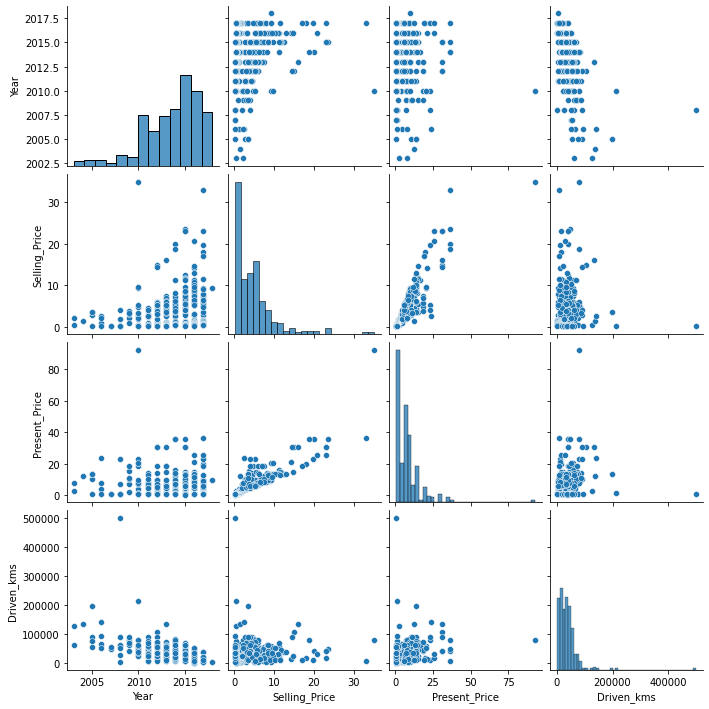

In [ ]:
sns.pairplot(df, 
             x_vars=['Year', 'Selling_Price', 'Present_Price', 'Driven_kms'],
             y_vars=['Year', 'Selling_Price', 'Present_Price', 'Driven_kms'])

In [ ]:
df.Year.map(cat_dic)

0      0
1      1
2      2
3      3
4      0
      ..
296    6
297    5
298    7
299    2
300    6
Name: Year, Length: 301, dtype: int64

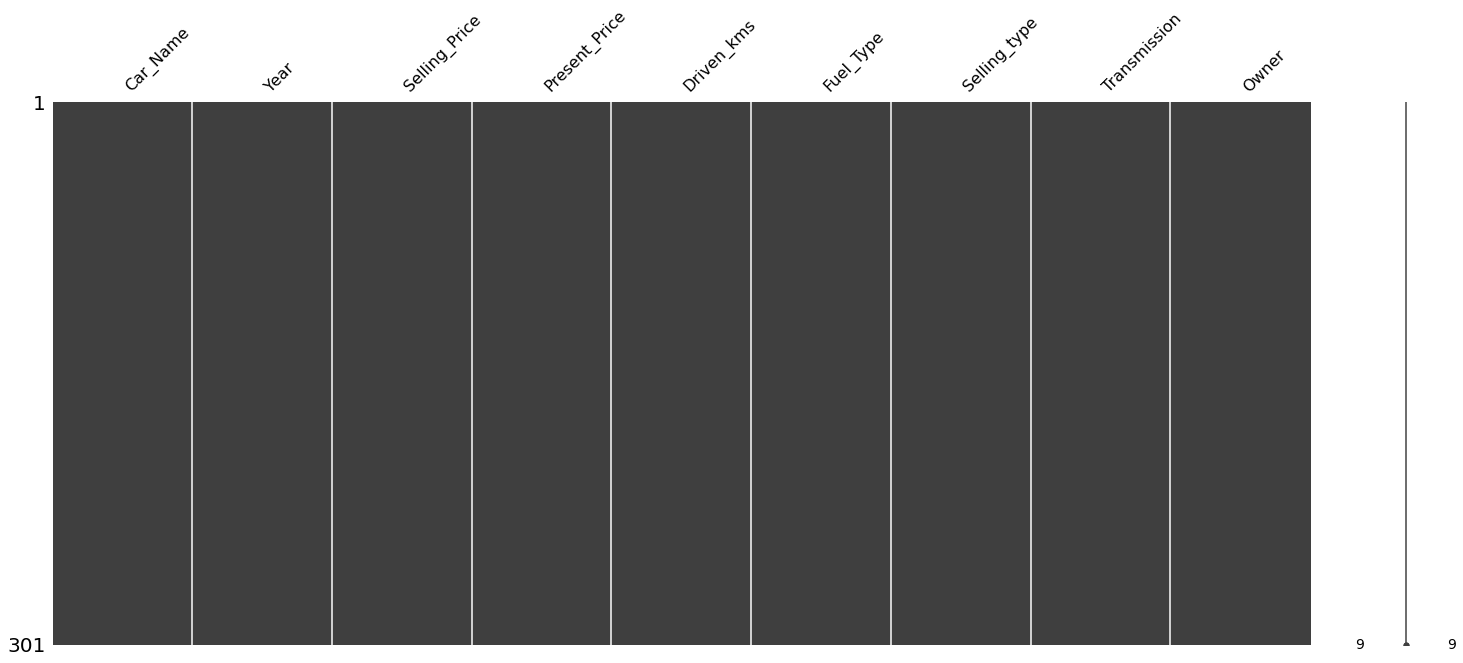

In [ ]:
import missingno as msg
msg.matrix(df)

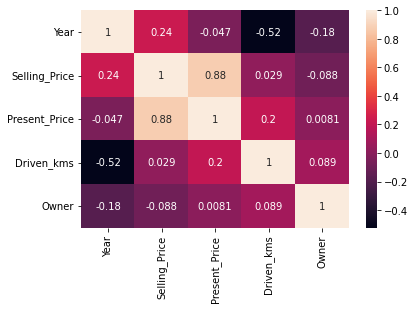

In [ ]:
sns.heatmap(df.corr(), annot =True)

In [ ]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


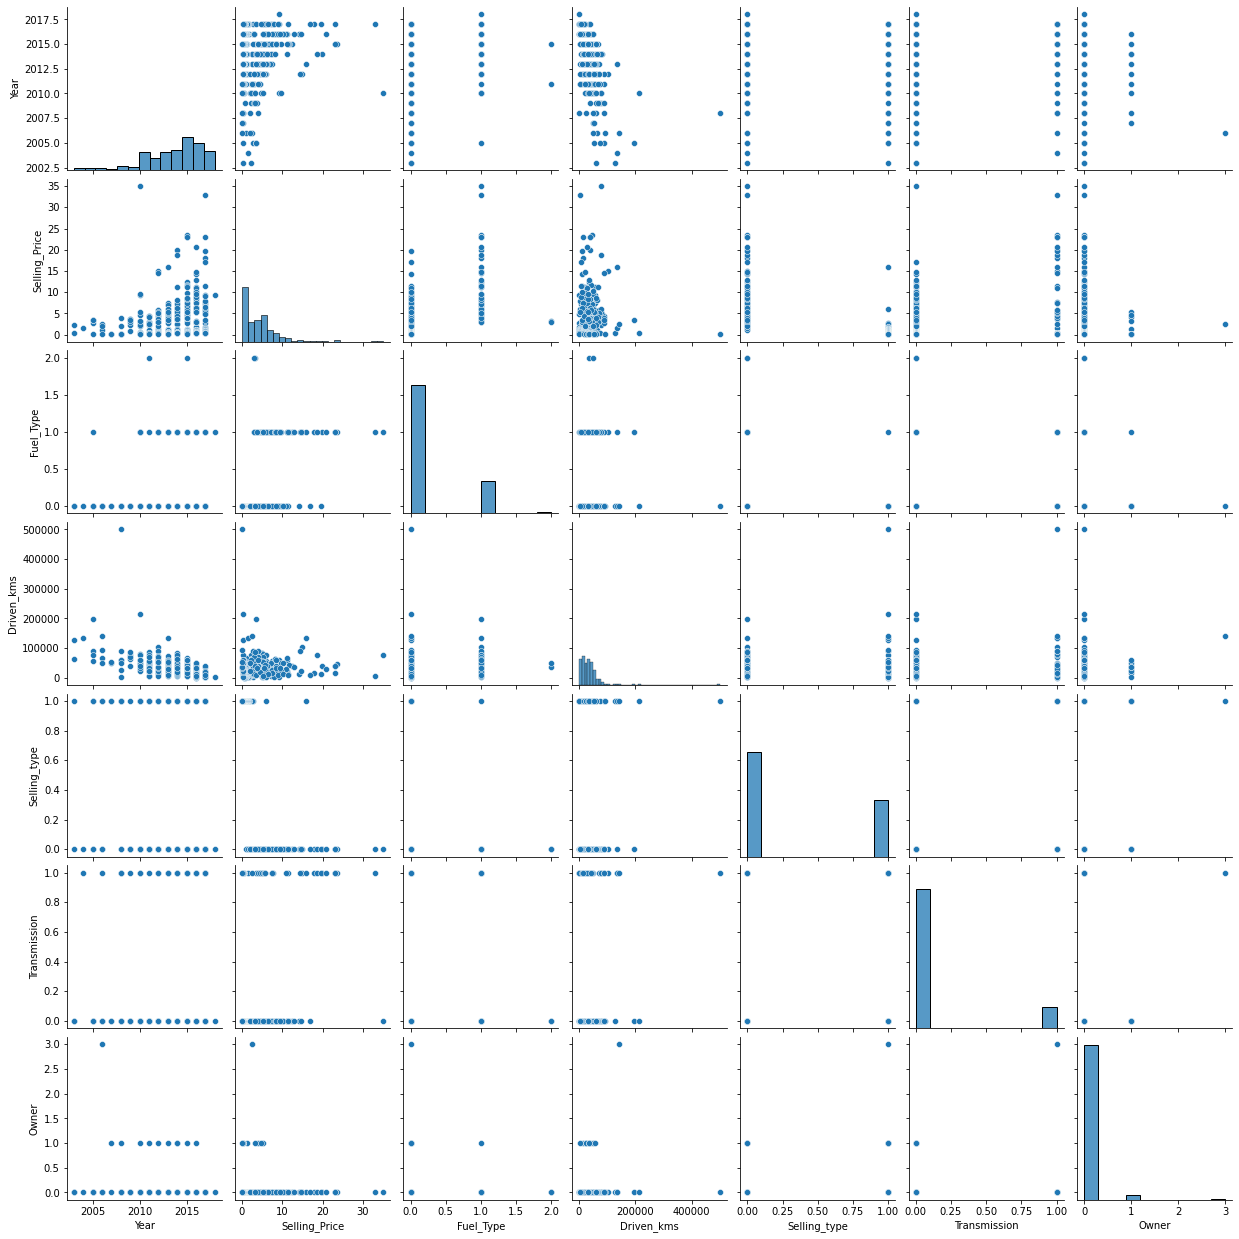

In [ ]:
sns.pairplot(df, 
             x_vars=['Year', 'Selling_Price', 'Fuel_Type', 'Driven_kms', 'Selling_type', 'Transmission', 'Owner'],
             y_vars=['Year', 'Selling_Price', 'Fuel_Type', 'Driven_kms', 'Selling_type', 'Transmission', 'Owner'])

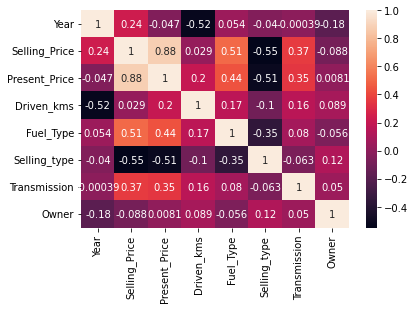

In [ ]:
sns.heatmap(df.corr(), annot =True)

In [ ]:
x = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

In [ ]:
x

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [ ]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 7)
(61, 7)
(240,)
(61,)


In [ ]:
# Selección de las etiquetas de las variables numéricas
X_num = X_train.select_dtypes(include=np.number).columns
print(X_num)

Index(['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type',
       'Transmission', 'Owner'],
      dtype='object')


In [ ]:
X_train.dtypes

Year               int64
Present_Price    float64
Driven_kms         int64
Fuel_Type          int64
Selling_type       int64
Transmission       int64
Owner              int64
dtype: object

In [ ]:
from sklearn import pipeline
# Creación de un Pipeline para el preprocesamiento de las variables numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  MinMaxScaler(feature_range=(0, 1)))])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

def convert (a):
  return str (a)

X_train.Year = X_train.Year.apply(convert)
X_num = X_train.select_dtypes(include = np.number).columns
x_cat = X_train.select_dtypes(include=np.object).columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app


In [ ]:
X_train.dtypes

Year              object
Present_Price    float64
Driven_kms         int64
Fuel_Type          int64
Selling_type       int64
Transmission       int64
Owner              int64
dtype: object

In [ ]:
X_num

Index(['Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type',
       'Transmission', 'Owner'],
      dtype='object')

In [ ]:
x_cat

Index(['Year'], dtype='object')

In [ ]:
# Delimitar el preprocesamiento de variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X_num)])

In [ ]:
lineal = LinearRegression()
lineal

LinearRegression()

In [ ]:
lineal.fit(X_train, y_train)

LinearRegression()

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
columnas = list(df.columns)
columnas.remove('Car_Name')
columnas.remove('Present_Price')
columnas

['Year',
 'Selling_Price',
 'Driven_kms',
 'Fuel_Type',
 'Selling_type',
 'Transmission',
 'Owner']

In [ ]:

print(pd.Series(lineal.coef_.tolist(), index =columnas))

Year             0.391749
Selling_Price    0.436538
Driven_kms      -0.000006
Fuel_Type        1.444519
Selling_type    -1.121540
Transmission     1.439530
Owner           -0.990538
dtype: float64
